In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
pd.set_option('display.max_colwidth', None)

In [ ]:
def create_destination_setup(img_directory_path, labels_directory_path):
    os.makedirs(img_directory_path, exist_ok=True)
    os.makedirs(labels_directory_path, exist_ok=True)
img_directory_path = "./augmentation/images"
labels_directory_path = "./augmentation/labels"
create_destination_setup(img_directory_path, labels_directory_path)

In [ ]:
df = pd.read_csv('cropped_640_by_640.csv', index_col=0)

In [ ]:
new_image_folder = '../yolov5/data/train/images'
df['image_path'] = df['image_path'].apply(lambda x: os.path.join(new_image_folder, os.path.basename(x)))

new_labels_folder = './augmentation/labels'
df['label_path'] = df['label_path'].apply(lambda x: os.path.join(new_labels_folder, os.path.basename(x)))

In [ ]:
df

In [ ]:
def rotate_image(image_path, angle):
    # Read the image
    original_image = cv2.imread(image_path)

    # Get the image center
    center = (original_image.shape[1] // 2, original_image.shape[0] // 2)

    # Define the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Apply the rotation to the image
    rotated_image = cv2.warpAffine(original_image, rotation_matrix, (original_image.shape[1], original_image.shape[0]))

    return original_image, rotated_image

### Rotate Yellow

In [ ]:
# Not needed.

### Rotate Large Orange Cone

In [ ]:
def write_annotations_to_text_file(dataframe):
    for index, row in dataframe.iterrows():
        class_label = row['class_label']
        x_center = row['x_center']
        y_center = row['y_center']
        width = row['width']
        height = row['height']
        label_path = row['rotate_label_path']

        # Construct the line
        line = f"{class_label} {x_center} {y_center} {width} {height}\n"

        # Write the line to the specified file
        print("writting :", label_path)
        with open(label_path, 'a') as file:
            file.write(line)
            
def save_rotate(df):
    rotation_angles = [50, 100, 150, 200, 250]
    data_img = []
    data_label = []
    class_label = []
    x_center = []
    y_center = []
    width = []
    height = []
    df_sample = pd.DataFrame()
    for i, row in df.iterrows():
        for angle in rotation_angles:
            class_label.append(row['class_label'])
            x_center.append(row['x_center'])
            y_center.append(row['y_center'])
            width.append(row['width'])
            height.append(row['height'])
            original_image, rotated_image = rotate_image(row['image_path'], angle)
            image_file_extension = os.path.splitext(os.path.basename(row['image_path']))[1]
            image_file_name = os.path.splitext(os.path.basename(row['image_path']))[0]
            
            image_save_path = f"./augmentation/images/{image_file_name}_{angle}{image_file_extension}"
            data_img.append(image_save_path)
            
            label_save_path = f"./augmentation/labels/{image_file_name}_{angle}.txt"
            data_label.append(label_save_path)
            
            print("writting :", image_save_path)
            cv2.imwrite(image_save_path, rotated_image)
    df_sample['class_label'] = class_label
    df_sample['x_center'] = x_center
    df_sample['y_center'] = y_center
    df_sample['width'] = width
    df_sample['height'] = height
    df_sample['rotate_image_path'] = data_img
    df_sample['rotate_label_path'] = data_label
    return df_sample

def cone_rotate_data(df):
    df_large_orange_cone = df[df['class_label']==1]
    df_sample = save_rotate(df_large_orange_cone)
    write_annotations_to_text_file(df_sample)
    return df_sample

# Dataframe for large orange cone.
df_loc = cone_rotate_data(df)

In [ ]:
df_loc.to_csv('large_orange_cone_for_augment.csv', index=False)

### Rotate Orange Cone

In [ ]:
def write_annotations_to_text_file(dataframe):
    for index, row in dataframe.iterrows():
        class_label = row['class_label']
        x_center = row['x_center']
        y_center = row['y_center']
        width = row['width']
        height = row['height']
        label_path = row['rotate_label_path']

        # Construct the line
        line = f"{class_label} {x_center} {y_center} {width} {height}\n"

        # Write the line to the specified file
        print("writting :", label_path)
        with open(label_path, 'a') as file:
            file.write(line)
            
def save_rotate(df):
    rotation_angles = [50, 100, 150, 200, 250]
    data_img = []
    data_label = []
    class_label = []
    x_center = []
    y_center = []
    width = []
    height = []
    df_sample = pd.DataFrame()
    for i, row in df[0:100].iterrows():
        for angle in rotation_angles:
            class_label.append(row['class_label'])
            x_center.append(row['x_center'])
            y_center.append(row['y_center'])
            width.append(row['width'])
            height.append(row['height'])
            original_image, rotated_image = rotate_image(row['image_path'], angle)
            image_file_extension = os.path.splitext(os.path.basename(row['image_path']))[1]
            image_file_name = os.path.splitext(os.path.basename(row['image_path']))[0]
            
            image_save_path = f"./augmentation/images/{image_file_name}_{angle}{image_file_extension}"
            data_img.append(image_save_path)
            
            label_save_path = f"./augmentation/labels/{image_file_name}_{angle}.txt"
            data_label.append(label_save_path)
            
            print("writting :", image_save_path)
            cv2.imwrite(image_save_path, rotated_image)
    df_sample['class_label'] = class_label
    df_sample['x_center'] = x_center
    df_sample['y_center'] = y_center
    df_sample['width'] = width
    df_sample['height'] = height
    df_sample['rotate_image_path'] = data_img
    df_sample['rotate_label_path'] = data_label
    return df_sample

def cone_rotate_data(df):
    df_orange_cone = df[df['class_label']==2]
    df_sample = save_rotate(df_orange_cone)
    write_annotations_to_text_file(df_sample)
    return df_sample

# Dataframe for orange cone.
df_oc = cone_rotate_data(df)

In [ ]:
df_oc.to_csv('orange_cone_for_augment.csv', index=False)

### Rotate Unknown Cone

In [ ]:
def write_annotations_to_text_file(dataframe):
    for index, row in dataframe.iterrows():
        class_label = row['class_label']
        x_center = row['x_center']
        y_center = row['y_center']
        width = row['width']
        height = row['height']
        label_path = row['rotate_label_path']

        # Construct the line
        line = f"{class_label} {x_center} {y_center} {width} {height}\n"

        # Write the line to the specified file
        print("writting :", label_path)
        with open(label_path, 'a') as file:
            file.write(line)
            
def save_rotate(df):
    rotation_angles = [50, 100, 150, 200, 250]#[45, 90, 180, 270]
    data_img = []
    data_label = []
    class_label = []
    x_center = []
    y_center = []
    width = []
    height = []
    df_sample = pd.DataFrame()
    for i, row in df.iterrows():
        for angle in rotation_angles:
            class_label.append(row['class_label'])
            x_center.append(row['x_center'])
            y_center.append(row['y_center'])
            width.append(row['width'])
            height.append(row['height'])
            original_image, rotated_image = rotate_image(row['image_path'], angle)
            image_file_extension = os.path.splitext(os.path.basename(row['image_path']))[1]
            image_file_name = os.path.splitext(os.path.basename(row['image_path']))[0]
            
            image_save_path = f"./augmentation/images/{image_file_name}_{angle}{image_file_extension}"
            data_img.append(image_save_path)
            
            label_save_path = f"./augmentation/labels/{image_file_name}_{angle}.txt"
            data_label.append(label_save_path)
            
            print("writting :", image_save_path)
            cv2.imwrite(image_save_path, rotated_image)
    df_sample['class_label'] = class_label
    df_sample['x_center'] = x_center
    df_sample['y_center'] = y_center
    df_sample['width'] = width
    df_sample['height'] = height
    df_sample['rotate_image_path'] = data_img
    df_sample['rotate_label_path'] = data_label
    return df_sample

def cone_rotate_data(df):
    df_unknown_cone = df[df['class_label']==3]
    df_sample = save_rotate(df_unknown_cone)
    write_annotations_to_text_file(df_sample)
    return df_sample

# Dataframe for orange cone.
df_uc = cone_rotate_data(df)

In [ ]:
df_uc.to_csv('unknown_cone_for_augment.csv', index=False)

## Augmentation

In [2]:
df_uc = pd.read_csv('unknown_cone_for_augment.csv')

In [4]:
def horizontal_flip(image):
    return cv2.flip(image, 1)

def vertical_flip(image):
    return cv2.flip(image, 0)

def scale_augmentation(image, scale_factor=0.8):
    height, width = image.shape[:2]
    scaled_image = cv2.resize(image, (int(width * scale_factor), int(height * scale_factor)))
    return cv2.resize(scaled_image, (width, height))

def cutout(image, cutout_size=100):
    height, width = image.shape[:2]
    cutout_x = np.random.randint(0, width - cutout_size)
    cutout_y = np.random.randint(0, height - cutout_size)

    image[cutout_y:cutout_y + cutout_size, cutout_x:cutout_x + cutout_size, :] = 0
    return image

def random_erasing(image, p=0.5, s=(0.02, 0.4), r=(0.3, 3.3)):
    if np.random.rand() > p:
        return image

    height, width = image.shape[:2]
    area = height * width

    target_area = np.random.uniform(s[0], s[1]) * area
    aspect_ratio = np.random.uniform(r[0], r[1])

    h = int(np.sqrt(target_area * aspect_ratio))
    w = int(np.sqrt(target_area / aspect_ratio))

    if w < width and h < height:
        x = np.random.randint(0, width - w)
        y = np.random.randint(0, height - h)
        image[y:y + h, x:x + w, :] = 0

    return image

def random_crop(image, crop_size=512):
    height, width = image.shape[:2]
    x = np.random.randint(0, width - crop_size)
    y = np.random.randint(0, height - crop_size)

    return image[y:y + crop_size, x:x + crop_size, :]

def apply_augmentations(image_path):
    image = cv2.imread(image_path)

    # Applying augmentations
    augmented_images = [
        horizontal_flip(image),
        vertical_flip(image),
        scale_augmentation(image),
        cutout(image),
        random_erasing(image),
        random_crop(image)
    ]

    augmented_images_titles = [
        'horizontal_flip',
        'vertical_flip',
        'scale',
        'cutout',
        'random_erasing',
        'random_crop']
    return augmented_images, augmented_images_titles

def write_annotations_to_text_file(dataframe):
    for index, row in dataframe.iterrows():
        class_label = row['class_label']
        x_center = row['x_center']
        y_center = row['y_center']
        width = row['width']
        height = row['height']
        label_path = row['augment_label_path']

        # Construct the line
        line = f"{class_label} {x_center} {y_center} {width} {height}\n"

        # Write the line to the specified file
        print("writting :", label_path)
        with open(label_path, 'a') as file:
            file.write(line)

def save_augment(df):
    data_img = []
    data_label = []
    class_label = []
    x_center = []
    y_center = []
    width = []
    height = []
    df_sample = pd.DataFrame()
    for i, row in df.iterrows():
        augmented_images, augmented_images_titles = apply_augmentations(row['rotate_image_path'])
        for image, title in zip(augmented_images, augmented_images_titles):
            class_label.append(row['class_label'])
            x_center.append(row['x_center'])
            y_center.append(row['y_center'])
            width.append(row['width'])
            height.append(row['height'])
            
            image_file_extension = os.path.splitext(os.path.basename(row['rotate_image_path']))[1]
            image_file_name = os.path.splitext(os.path.basename(row['rotate_image_path']))[0]
            
            image_save_path = f"./augmentation/images/{image_file_name}_{title}{image_file_extension}"
            data_img.append(image_save_path)
            
            label_save_path = f"./augmentation/labels/{image_file_name}_{title}.txt"
            data_label.append(label_save_path)
            
            print("writting :", image_save_path)
            cv2.imwrite(image_save_path, image)
    df_sample['class_label'] = class_label
    df_sample['x_center'] = x_center
    df_sample['y_center'] = y_center
    df_sample['width'] = width
    df_sample['height'] = height
    df_sample['augment_image_path'] = data_img
    df_sample['augment_label_path'] = data_label
    return df_sample

def augment_data(df):
    df_cone = df[df['class_label']==3]
    df_sample = save_augment(df_cone)
    write_annotations_to_text_file(df_sample)
    print("Complete")
    return df_sample

uc_augment_df = augment_data(df_uc)

writting : ./augmentation/images/FRT_00160_png_unknown_cone_2_50_horizontal_flip.png
writting : ./augmentation/images/FRT_00160_png_unknown_cone_2_50_vertical_flip.png
writting : ./augmentation/images/FRT_00160_png_unknown_cone_2_50_scale.png
writting : ./augmentation/images/FRT_00160_png_unknown_cone_2_50_cutout.png
writting : ./augmentation/images/FRT_00160_png_unknown_cone_2_50_random_erasing.png
writting : ./augmentation/images/FRT_00160_png_unknown_cone_2_50_random_crop.png
writting : ./augmentation/images/FRT_00160_png_unknown_cone_2_100_horizontal_flip.png
writting : ./augmentation/images/FRT_00160_png_unknown_cone_2_100_vertical_flip.png
writting : ./augmentation/images/FRT_00160_png_unknown_cone_2_100_scale.png
writting : ./augmentation/images/FRT_00160_png_unknown_cone_2_100_cutout.png
writting : ./augmentation/images/FRT_00160_png_unknown_cone_2_100_random_erasing.png
writting : ./augmentation/images/FRT_00160_png_unknown_cone_2_100_random_crop.png
writting : ./augmentation/

In [23]:
uc_augment_df

,class_label,x_center,y_center,width,height,augment_image_path,augment_label_path
0,3,0.5,0.5,1.0,1.0,./augmentation/images/FRT_00160_png_unknown_cone_2_50_horizontal_flip.png,./augmentation/labels/FRT_00160_png_unknown_cone_2_50_horizontal_flip.txt
1,3,0.5,0.5,1.0,1.0,./augmentation/images/FRT_00160_png_unknown_cone_2_50_vertical_flip.png,./augmentation/labels/FRT_00160_png_unknown_cone_2_50_vertical_flip.txt
2,3,0.5,0.5,1.0,1.0,./augmentation/images/FRT_00160_png_unknown_cone_2_50_scale.png,./augmentation/labels/FRT_00160_png_unknown_cone_2_50_scale.txt
3,3,0.5,0.5,1.0,1.0,./augmentation/images/FRT_00160_png_unknown_cone_2_50_cutout.png,./augmentation/labels/FRT_00160_png_unknown_cone_2_50_cutout.txt
4,3,0.5,0.5,1.0,1.0,./augmentation/images/FRT_00160_png_unknown_cone_2_50_random_erasing.png,./augmentation/labels/FRT_00160_png_unknown_cone_2_50_random_erasing.txt
...,...,...,...,...,...,...,...
985,3,0.5,0.5,1.0,1.0,./augmentation/images/bme_00005_jpg_unknown_cone_9_250_vertical_flip.jpg,./augmentation/labels/bme_00005_jpg_unknown_cone_9_250_vertical_flip.txt
986,3,0.5,0.5,1.0,1.0,./augmentation/images/bme_00005_jpg_unknown_cone_9_250_scale.jpg,./augmentation/labels/bme_00005_jpg_unknown_cone_9_250_scale.txt
987,3,0.5,0.5,1.0,1.0,./augmentation/images/bme_00005_jpg_unknown_cone_9_250_cutout.jpg,./augmentation/labels/bme_00005_jpg_unknown_cone_9_250_cutout.txt
988,3,0.5,0.5,1.0,1.0,./augmentation/images/bme_00005_jpg_unknown_cone_9_250_random_erasing.jpg,./augmentation/labels/bme_00005_jpg_unknown_cone_9_250_random_erasing.txt


In [19]:
# df_uc

### Rotate Test

In [22]:
rotation_angle = 180
for i, row in df[0:30].iterrows():
    
    original_image, rotated_image = rotate_image(row['image_path'], rotation_angle)
    # image = cv2.imread(row['augment_image_path'])
    
    # Get normalized coordinates
    x_center_norm = row['x_center']
    y_center_norm = row['y_center']
    width_norm = row['width']
    height_norm = row['height']

    # Calculate bounding box coordinates in pixel values
    x_center_px = int(x_center_norm * original_image.shape[1])
    y_center_px = int(y_center_norm * original_image.shape[0])
    width_px = int(width_norm * original_image.shape[1])
    height_px = int(height_norm * original_image.shape[0])

    # Calculate the top-left corner of the bounding box
    x_top_left_px = int(x_center_px - width_px / 2)
    y_top_left_px = int(y_center_px - height_px / 2)

    # Create a rectangle patch
    rect = patches.Rectangle(
        (x_top_left_px, y_top_left_px),
        width_px, height_px,
        linewidth=5, edgecolor='r', facecolor='none'
    )
    # Create a figure and axes outside the loop
    fig, ax = plt.subplots()
    ax.add_patch(rect)

    # ax.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    # ax.set_title("Original Image")    
    
    ax.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    ax.set_title("Flipped Image")
    
    plt.show()

NameError: name 'original_image' is not defined

### Testing images and bounding boxes

path: ./augmentation/images/FRT_00175_png_unknown_cone_11_200_random_crop.png
Image Size: 512 x 512


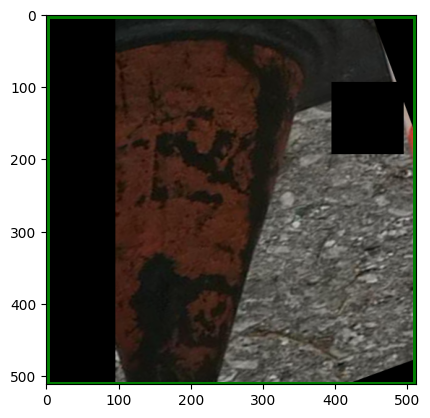

KeyboardInterrupt: 

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
from IPython.display import display, Image, clear_output

# Assuming your DataFrame has columns: 'image_path', 'x_center', 'y_center', 'width', 'height'
# Replace these column names with your actual column names if they are different.

def draw_bounding_box(image_path, x_center, y_center, width, height):
    # Read the image using Matplotlib
    img = plt.imread(image_path)

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(img)

    # Calculate bounding box coordinates
    x1 = int((x_center - width / 2) * img.shape[1])
    y1 = int((y_center - height / 2) * img.shape[0])
    x2 = int((x_center + width / 2) * img.shape[1])
    y2 = int((y_center + height / 2) * img.shape[0])

    # Create a Rectangle patch
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=5, edgecolor='g', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    print(f"Image Size: {img.shape[1]} x {img.shape[0]}")

    # Display the image with the bounding box
    plt.show()
    time.sleep(2)
    clear_output(wait=True)

# Example usage:
# Assuming your DataFrame is named df
for index, row in uc_augment_df[200:300].iterrows():
    print("path:", row['augment_image_path'])
    image_path = row['augment_image_path']
    x_center = row['x_center']
    y_center = row['y_center']
    width = row['width']
    height = row['height']

    draw_bounding_box(image_path, x_center, y_center, width, height)
